# NLP Assignment: Real or Not Disaster tweets


**Author:** Marang Mutloatse

## Executive Summary

This notebook represent work completed by Marang Mutloatse using NLP for the kaggle competition [Real or Not? Disaster Tweets](https://www.kaggle.com/c/nlp-getting-started).

**Overview of decision process:**

1. A basic data profiling is conducted to generate a simple understanding of the data.
- Thereafter, an exploratory analysis is conducted primarily to check for missing data, feature distribution, the cardinality of the features and balance of the target variable.
- Then both a CountVectorizer and TfidfVectorizer are employed to test and train data inorder to generate a baseline model for submission. Note  the the *keyword* and *location* are dropped but the keyword column may be reintroduced for further analysis.
- Uncertainty as to which model to apply, I compared a basic Logistic Regression **(LogReg)**, Multinomial Naive-Bayes **(NB)**, Stochastic Gradient Classifier, Passive Aggressive Classifier, Random Forest Classifier, Decision tree classifier, Support Vector Machines **(SVM)**, XGBoost Classifier and a Multi-layered Perceptron. 
- The data is now precprocessed to remove the special characters, hashtags( **#**), *@* mentions, urls, normalize data, to remove didgits etc.
- The NLP workflow is then followed starting by completing a lexical analysis, thereafter a morphological analysis and then a syntax analysis. Within each stage of analysis there are several techniques which will be applied, and cross validation results of these techniques will be compared within each workflow section.
- Various tokenizers, combinations of  stemming, lemmatizing and POStagging, POSNoun-tagging
- SelectKBest  are conducted in order to minimize overfitting and reduce sparsity.
- The final features are now chosen and hyperparamter tuning is conducted for several models and a hard voting classifiers model is generated to optimize.
- The final model and iS produced, cross-validated and the final predictions are saved and uploaded to kaggle. The final Kaggle average f1-score is 0.81595 (As of 14h00, April 2020: **Top 30%**).

## Data Exploration

**Missing Values**:

- location has 33 % of missing values, moreover, the cardinality of the features is too high and unnecessary.
- keyword has 0.8% of missing values, but have more relevance in identifying words to identify in the tweet to identify disaster probability.
- There is no is discernable relationship with the missing data in keywords and location, so these features are subsequently dropped.

**Target Class Analysis**

- 43 % are disaster-related tweets.
- average word count and character length per tweets per class are not significantly distinguishable.

## Baseline Modelling

I obtain a mean cross validation f1 score of 0.73 and kaggle submission f1 score of 0.75550. The kaggle submission score is only based on 30% of test data and no significant NLP techniques have been applied to the data other than dropping columns of **id**, **keywords** and **location**. F1 is a combination of precision and recall and is useful to evaluate models where we want to select or find balance between precision and recall. Because the kaggle scoring metric is f1, the target variable is slightly imbalanced and it's a binary classification problem: throughout the ML workfklow, accuracy, the confusion matrix will be analyzed as well as Matthew's Correlation Co-efficient (MCC). However, the cross-validation scoring metric is f1. It should be noted, MCC measures the quality of a binary classifier ranging from -1 to 1, whereby:

- (-1) indicates a a completely incorrect binary classifer
- 0 indicates not better than random prediction (primarily due to bias)
- (+1) indicates a completely correct binary classifer

In fact, when a prediction displays many true positives but few true negatives (or many true negatives but few true positives), F1 and accuracy can provide misleading information, while MCC always generates results that reflect the overall prediction issue. This will be noted in the ML model building.

## Findings

- The three best models were across toeknizers were NB, LogReg and SVM. Stochastic Gradient Classifiers had metrics especially the f1-score on par with SVM. However, in cross-validation, the standard deviation was too large, even larger than the results from the Passive Aggressive Classifiers. But SVM consistently had the highest accuracies and MCC scores which means bodes well for the robustness of the model for the data. 

# NLP workflow

## Data Preprocessing

### Data Cleaning

**function:**

- removes urls
- renames @ to USER
- changes all numbers or digit to word NUMBER
- remove all characters if not in the list (a-zA-Z\d\s)
- eliminate muliple letters like "oooohhh"
- remove extra spaces at beginnign and end of words.

**within vectorizer**    
- using *unicode* argument in vectroizers to strip accents, which does exactly what it sounds like: it removes accents and in addition performs other text normalization during preprocessing.
- min_df, max_features and max_df were optimized: By adjusting the document frequency, terms will be ignored that have a document frequncy higher or lower of the given threshold.
- stopword are removed.

### POStagging & NounPOS Tagging

Because nouns are the most common type of POS, a comparison between the two tagging techniques illustrates that although the NOUNPOS has a lower accuracy, it's not signficantly lower. This can be helpful for deployment of the model in real-world production: functionality vs accuracy tradeoff.  

### Stemming & Lemmatization

Stemming is the process of reducing inflected (or sometimes derived) words to their stem, base or root form — generally a written word form. Example if we were to stem the following words: “Stems”, “Stemming”, “Stemmed”, “and Stemtization”, the result would be a single word “stem”.A slight variant of stemming is lemmatization. The major difference between these is, that, stemming can often create non-existent words, whereas lemmas are actual words. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma. Examples of Lemmatization are that “run” is a base form for words like “running” or “ran” or that the word “better” and “good” are in the same lemma so they are considered the same.

A Porter Stemmer and WordNetLemmatizer are applied and have improved the results significantly for both vectorizer. Suprisingly the stemming is performing better than lemmatization.

### Tokenization

Tokenization  describes the process of converting the normal text strings into a list of tokens i.e. words. Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings. 

Treebank, Tweetokenzier decrease in accuracy and f1. Regex tokenizer performs the best in all three categories MCC, accuracy and f1. 

# Model/Pipeline Evaluation

## Model Analysis

Lemmatization + POStagging performed best in my model, but when uploaded to kaggle, received a 0.81190. I think reducing the features would improve it. But our final model is lemmatized with all the data preprocessing techniques applied above.

LogReg model had a f1-score of 0.754951 and accuracy of 80.10% but had a recall perccentage of 69%, which is not good from the business perspective when one wants to identify clearly identify a disaster, but has a large number of false negatives. 

NB model had a f1-score of 0.744951 and accuracy of 79.10% but had a recall perccentage of 71%.

SVM had a f1-score 0.76 and accuracy of 81% and low recall of 64 %. So individually they are decent models, but using the discriminative nature of the SVM and LogReg, and generative nature of the NB, using this model in a hard voting model would improve the recall percentages.

**Final Model Hyperparameters for Voting Classifier with hard voting:**

- **Logistic Regression:** {C = 1.0, class_weight = 'balanced',penalty = 'l2',solver = 'newton-cg'}
- **Multinomial Naive-Bayes**: {alpha = 0.9,fit_prior=False}
- **SVM**: {C=1, random_state = 1, gamma='scale', class_weight = 'balanced', probability=True}


## Model Evaluation

- Cross validation scores of ~81 % and 0.77, for accuracy and f1 respectively and a recall of 73 %. Both had negligible standard deviations of 0.0005 and 0.0008 respectively.


# Future Work

As this Kaggle challenge is ongoing, and there were time limitations to complete the current assignment, below are the recommendations for future work to improve the prediction model.


**Natural Language Processing techniques:**

- Use name entity recognition using particulary using GMB Database which is a database whereby **(geo = Geographical Entity, org = Organization per = Person, gpe = Geopolitical Entity, tim = Time indicator, art = Artifact, eve = Event, nat = Natural Phenomenon)**. This would be useful as these named entities can alleviate the disambiguation of what is a disaster?
- effectively deal with the mislabelling of tweets. This was particularly relevant for tweets which were simply had links/urls and mentions.
- This disambiguation can be alleviated generating features including number of hastags, number of punctuation marks, type of punctuation marks, user at mentions.
- The second mission is binary classification of disasterrelated tweets to one of two categories, subjective tweets (i.e. tweets that express an emotion) vs. objective tweets(such as news reports on disasters). To achieve, on can manually according to the keywords with highest diaster probability disaster-related tweets. The motivation behind this task is that objective tweets, such as informative news reports, are likely to be published after the event had already become clear to emergency services, while subjective tweets may contain invaluable first-person testimonies of ongoing events, as suggested by [Demir et. al](https://www.researchgate.net/publication/330140321_Identifying_disaster-related_tweets_and_their_semantic_spatial_and_temporal_context_using_deep_learning_natural_language_processing_and_spatial_analysis_a_case_study_of_Hurricane_Irma). 
- Use the TF-IDF scores to filter out features with scores closer to zero because they are less informative.
- Use tweepy or tweepyparser to deal with common twitter slang, jargon and abbreviations.


**Machine Learning Modelling:**

- Explore the use of the maximum entropy classifier as it has capabilities. Although the code is applied, the model was not executed
- Further investigate the Multi-perceptron classifier. Although a basic Multi-Layer perceptron was calculated for the baseline model, the model was not investigated further due to it being compuationally expensive.
- Examine the use of The super learner meta model. This is an ensemble machine learning algorithm that combines all of the models and model configurations that we've investigated for this text classification problem and uses them to make a prediction as-good-as or better than any single model that is investigated. Computationally expensive, but can be implemented if each model is pickled and then applied. The effectiveness of super-learning on tweet classification is still in its infancy, but would be interesting to explore.  
- Explore an automated grid search pipeline permutations for POStagging + Lemmatization etc to find the optimal combinations 

# References

Other than the code provided in class and the links at the end of session 5, below are other links to notebooks, websites, and articles where code or ideas for code implementation for the NLP workflow were sourced.

**Data Cleaning & Visualization:**

- [News Content Capstone Project](https://github.com/osterburg/news-content-capstone-project)
- [Exploratory Data Analysis for Natural Language Processing: A complete Guide to Python Tools](https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools)
- [Real or Not: Fake news classification](https://github.com/angelinakiman/RealOrNot_Kaggle/blob/master/RealorNot.ipynb)

**POStagging, Stemming, Lemmatization and Tokenization:**

- [NLP Tutorial: Exploring Text Data](https://github.com/bonzanini/nlp-tutorial/blob/master/notebooks/02%20pyconuk_exploratory_analysis.ipynb)
- [A comprehensive Naive Bayes Tutorial using scikit-learn](https://medium.com/@awantikdas/a-comprehensive-naive-bayes-tutorial-using-scikit-learn-f6b71ae84431)

- [How to Tokenize Tweets with Python](https://towardsdatascience.com/an-introduction-to-tweettokenizer-for-processing-tweets-9879389f8fe7)

**NLP Pipeline design:**

- [Tweets Classification Using Machine Learning](https://medium.com/analytics-vidhya/disaster-tweets-classification-using-machine-learning-ace4321332e8)
- [NLP Tutorial: Multiclass Text Classification](https://github.com/bonzanini/nlp-tutorial/blob/master/notebooks/03%20text_classification_Generic.ipynb)
- [How to Compare Machine Learning Algorithms with scikit-learn](https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/)
- [ML Feature Transformation, NLP, and Classification Modeling on Hotel Scoring](https://towardsdatascience.com/ml-feature-transformation-nlp-and-classification-modeling-on-hotel-scoring-94107353a015)
- [Hyper-parameter tuning with Pipelines](https://medium.com/@kocur4d/hyper-parameter-tuning-with-pipelines-5310aff069d6)

**Feature Generation:**

- [Twitter Sentiment Analysis using fastText](https://towardsdatascience.com/twitter-sentiment-analysis-using-fasttext-9ccd04465597)




# Final Kaggle Score

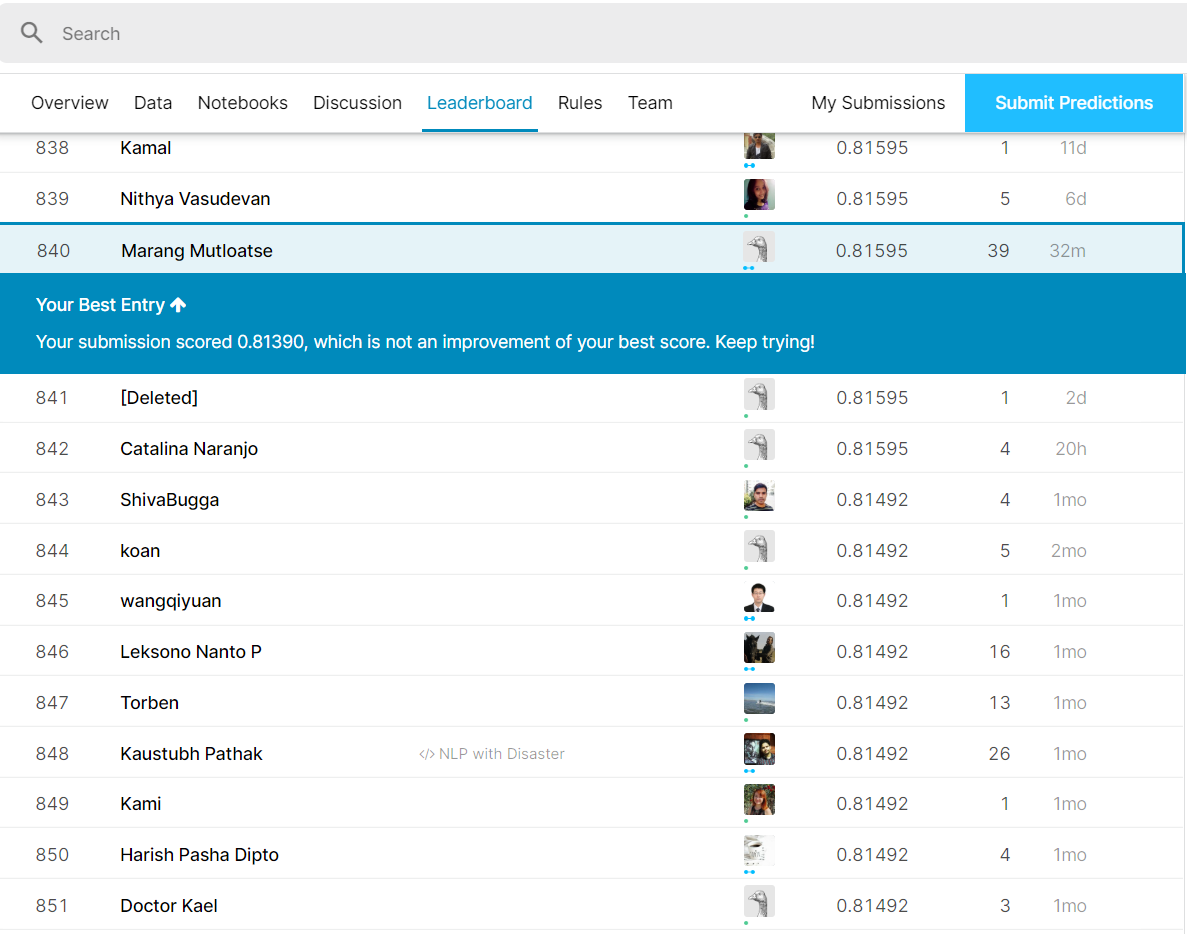

In [1]:
from IPython.display import Image
Image(filename='SCORES.png')